In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from braid_analysis import braid_filemanager
from braid_analysis import braid_slicing
from braid_analysis import braid_analysis_plots
from braid_analysis import flymath

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.
2024-11-27 19:02:39,932 [INFO] 
Limited Linear Model Support Detected! 
---> PYCHEBFUN is not installed. 
---> Install pychebfun to use chebfun derivatives (https://github.com/pychebfun/pychebfun/) 
You can still use other methods 



# Find and load data

In [5]:
data_directory = '.'
preprocessed_data_filename = braid_filemanager.get_filename(data_directory, 'preprocessed.hdf')
print('loading: ')
print(preprocessed_data_filename)
df = pd.read_hdf(preprocessed_data_filename)

loading: 
./20240628_162939_preprocessed.hdf


# Show object ids

In [6]:
print(df.obj_id_unique.unique())

['20240628_162939_1' '20240628_162939_13' '20240628_162939_35'
 '20240628_162939_92' '20240628_162939_104' '20240628_162939_105'
 '20240628_162939_106' '20240628_162939_127' '20240628_162939_132'
 '20240628_162939_135' '20240628_162939_137' '20240628_162939_138'
 '20240628_162939_140' '20240628_162939_141' '20240628_162939_144'
 '20240628_162939_146' '20240628_162939_151' '20240628_162939_155'
 '20240628_162939_157' '20240628_162939_166' '20240628_162939_167'
 '20240628_162939_169' '20240628_162939_173' '20240628_162939_178'
 '20240628_162939_201' '20240628_162939_202']


# Choose an object, grab trajectory

In [9]:
objid = '20240628_162939_157'
trajec = df[df['obj_id_unique']==objid].copy()

# Plot angular velocity and course for rough and smooth versions

Text(0.5, 0, 'time, sec')

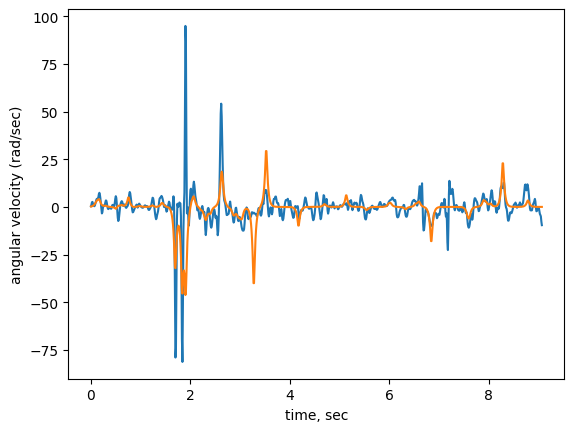

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)

time = trajec.timestamp - trajec.timestamp.min()
ax.plot(time, trajec.ang_vel_smoothish)
ax.plot(time, trajec.ang_vel_smoother)

ax.set_ylabel('angular velocity (rad/sec)')
ax.set_xlabel('time, sec')

Text(0.5, 0, 'time, sec')

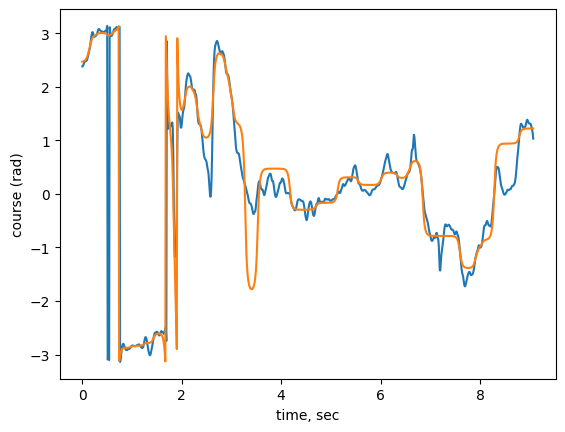

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(time, trajec.course_smoothish)
ax.plot(time, trajec.course_smoother)

ax.set_ylabel('course (rad)')
ax.set_xlabel('time, sec')

# Plot angular velocity as color over trajectory for rough and smooth ang vels

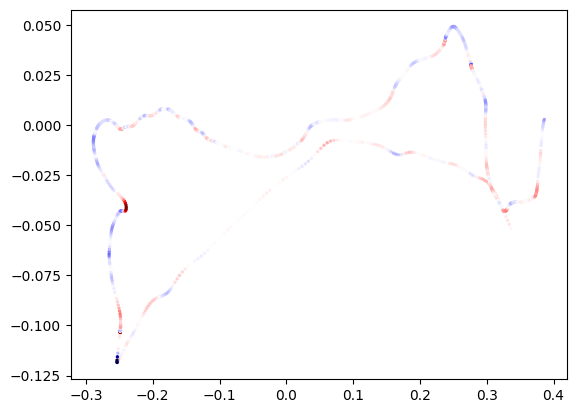

In [12]:
plt.scatter(trajec.x.values, trajec.y.values, c=trajec.ang_vel_smoothish.values, s=2, cmap='seismic',
           vmin=-50, vmax=50)

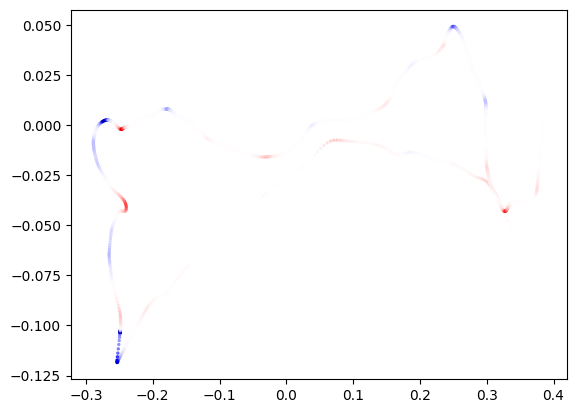

In [13]:
plt.scatter(trajec.x.values, trajec.y.values, c=trajec.ang_vel_smoother.values, s=2, cmap='seismic',
           vmin=-50, vmax=50)